## Import the libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the dataset

In [73]:
big = pd.read_csv('/Users/nicolasdemuynck/BeCode/GNT-ARAI-1.25/Content/00.Use cases/arinti/20200124_ews_observations.csv',
                   low_memory=False)

In [74]:
big.head(5)

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


## Data preprocessing

### Check for the patient with the most observations and not too much NaN values

In [75]:
observations = big.groupby('PatientId').count().sort_values(['ObservationDate'], ascending = False)
observations.head(40) #top 5 patients with most observations

,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
PatientId,,,,,,,,,,,,,,,,,
1743,643,643,643,616,616,643,643,643,643,643,643,643,643,643,643,643,643
1261,441,441,441,431,431,441,441,441,441,441,441,441,441,441,441,441,441
5797,441,441,441,423,423,441,441,441,441,441,441,441,441,441,441,441,441
630,356,356,356,315,315,356,356,356,356,356,356,356,356,356,356,356,356
1841,351,351,351,324,324,351,351,351,351,351,351,351,351,351,351,351,351
1199,310,310,310,297,297,310,310,310,310,310,310,310,310,310,310,310,310
6995,305,305,305,276,276,305,305,305,305,305,305,305,305,305,305,305,305
3080,305,305,305,292,292,305,305,305,305,305,305,305,305,305,305,305,305
1092,284,284,284,272,272,284,284,284,284,284,284,284,284,284,284,284,284


### Narrow down dataset to patient level

In [76]:
patient = big.loc[(big['PatientId'] == 1743)]
patient.head(5)

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
19840,1743,2019-06-15 13:32:39.0000000,NEWS2,4,122.0,0.0,ALERT,0,91.0,0.0,True,2.0,112,2,18,0,36.6,0
20025,1743,2019-06-15 20:22:36.0000000,NEWS2,5,109.0,1.0,ALERT,0,93.0,1.0,True,2.0,104,1,16,0,37.0,0
20471,1743,2019-06-16 14:23:34.0000000,NEWS2,3,117.0,0.0,ALERT,0,89.0,0.0,True,2.0,103,1,19,0,36.5,0
20617,1743,2019-06-16 19:49:24.0000000,NEWS2,3,123.0,0.0,ALERT,0,90.0,0.0,True,2.0,107,1,19,0,36.6,0
20794,1743,2019-06-17 04:39:15.0000000,NEWS2,4,102.0,1.0,ALERT,0,92.0,0.0,True,2.0,97,1,18,0,36.7,0


In [77]:
patient.count()

PatientId          643
ObservationDate    643
EwsProcedure       643
EWS_Total          643
SBP                616
SBP_Score          616
LOC                643
LOC_Score          643
SpO2               643
SpO2_Score         643
Add_O2             643
Add_O2_Score       643
HR                 643
HR_Score           643
RR                 643
RR_Score           643
TEMP               643
TEMP_Score         643
dtype: int64

In [78]:
patient.isnull().sum()

PatientId           0
ObservationDate     0
EwsProcedure        0
EWS_Total           0
SBP                27
SBP_Score          27
LOC                 0
LOC_Score           0
SpO2                0
SpO2_Score          0
Add_O2              0
Add_O2_Score        0
HR                  0
HR_Score            0
RR                  0
RR_Score            0
TEMP                0
TEMP_Score          0
dtype: int64

In [79]:
round((patient.isnull().sum()*100)/len(patient),2)

PatientId          0.0
ObservationDate    0.0
EwsProcedure       0.0
EWS_Total          0.0
SBP                4.2
SBP_Score          4.2
LOC                0.0
LOC_Score          0.0
SpO2               0.0
SpO2_Score         0.0
Add_O2             0.0
Add_O2_Score       0.0
HR                 0.0
HR_Score           0.0
RR                 0.0
RR_Score           0.0
TEMP               0.0
TEMP_Score         0.0
dtype: float64

In [80]:
patient.dropna(inplace = True)

<ipython-input-80-cc0ba19fc9bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient.dropna(inplace = True)


In [81]:
patient.isnull().sum()

PatientId          0
ObservationDate    0
EwsProcedure       0
EWS_Total          0
SBP                0
SBP_Score          0
LOC                0
LOC_Score          0
SpO2               0
SpO2_Score         0
Add_O2             0
Add_O2_Score       0
HR                 0
HR_Score           0
RR                 0
RR_Score           0
TEMP               0
TEMP_Score         0
dtype: int64

### Keep features with actual values

In [82]:
small = patient[['ObservationDate', 'EwsProcedure', 'EWS_Total',
             'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]
small.tail(5)

,ObservationDate,EwsProcedure,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
171085,2020-01-01 06:54:48.0000000,NEWS2,1,120.0,ALERT,95.0,False,98,15,36.5
171182,2020-01-01 11:10:28.0000000,NEWS2,3,116.0,ALERT,95.0,False,98,24,37.1
171290,2020-01-01 14:56:00.0000000,NEWS2,1,116.0,ALERT,93.0,False,107,16,37.6
171496,2020-01-01 21:30:12.0000000,NEWS2,2,102.0,ALERT,96.0,False,101,20,37.1
171696,2020-01-02 06:51:46.0000000,NEWS2,1,120.0,ALERT,95.0,False,93,18,36.5


### Make datetime dtype from Observation date

In [83]:
small['ObservationDate'] =  pd.to_datetime(small['ObservationDate'])

<ipython-input-83-c3115a3d3da5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['ObservationDate'] =  pd.to_datetime(small['ObservationDate'])


In [84]:
small.dtypes

ObservationDate    datetime64[ns]
EwsProcedure               object
EWS_Total                   int64
SBP                       float64
LOC                        object
SpO2                      float64
Add_O2                     object
HR                          int64
RR                          int64
TEMP                      float64
dtype: object

### Check for unique categorical values

In [86]:
print(small.EwsProcedure.unique())
print(small.LOC.unique())
print(small.Add_O2.unique())

['NEWS2']
['ALERT' 'VOICE']
[True False]


### Drop columns with only one value

In [87]:
del small['EwsProcedure']
small.head(5)

,ObservationDate,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
19840,2019-06-15 13:32:39,4,122.0,ALERT,91.0,True,112,18,36.6
20025,2019-06-15 20:22:36,5,109.0,ALERT,93.0,True,104,16,37.0
20471,2019-06-16 14:23:34,3,117.0,ALERT,89.0,True,103,19,36.5
20617,2019-06-16 19:49:24,3,123.0,ALERT,90.0,True,107,19,36.6
20794,2019-06-17 04:39:15,4,102.0,ALERT,92.0,True,97,18,36.7


### Use LabelEncoder for categorical values

In [88]:
encoder = LabelEncoder ()

for i in small.columns:
    if small[i].dtype == object:
        small[i] = encoder.fit_transform(small[i])
small.head()

<ipython-input-88-c618eb0df3d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small[i] = encoder.fit_transform(small[i])


,ObservationDate,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
19840,2019-06-15 13:32:39,4,122.0,0,91.0,1,112,18,36.6
20025,2019-06-15 20:22:36,5,109.0,0,93.0,1,104,16,37.0
20471,2019-06-16 14:23:34,3,117.0,0,89.0,1,103,19,36.5
20617,2019-06-16 19:49:24,3,123.0,0,90.0,1,107,19,36.6
20794,2019-06-17 04:39:15,4,102.0,0,92.0,1,97,18,36.7


In [90]:
print(small.LOC.unique())
print(small.Add_O2.unique())

[0 1]
[1 0]


## Descriptive statistics

In [96]:
describe = small[['EWS_Total','SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

In [97]:
describe.describe()

,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,4.272727,105.775974,0.006494,90.887987,0.845779,101.373377,18.123377,36.724838
std,1.490448,10.803423,0.080386,2.626095,0.361454,7.822848,1.922322,0.385404
min,1.000000,79.000000,0.000000,84.000000,0.000000,83.000000,13.000000,35.500000
25%,3.000000,98.000000,0.000000,89.000000,1.000000,96.000000,17.000000,36.500000
50%,4.000000,105.000000,0.000000,91.000000,1.000000,101.000000,18.000000,36.700000
75%,5.000000,113.000000,0.000000,93.000000,1.000000,107.000000,19.000000,37.000000
max,11.000000,178.000000,1.000000,100.000000,1.000000,156.000000,32.000000,38.600000


### Check for outliers via Boxplots

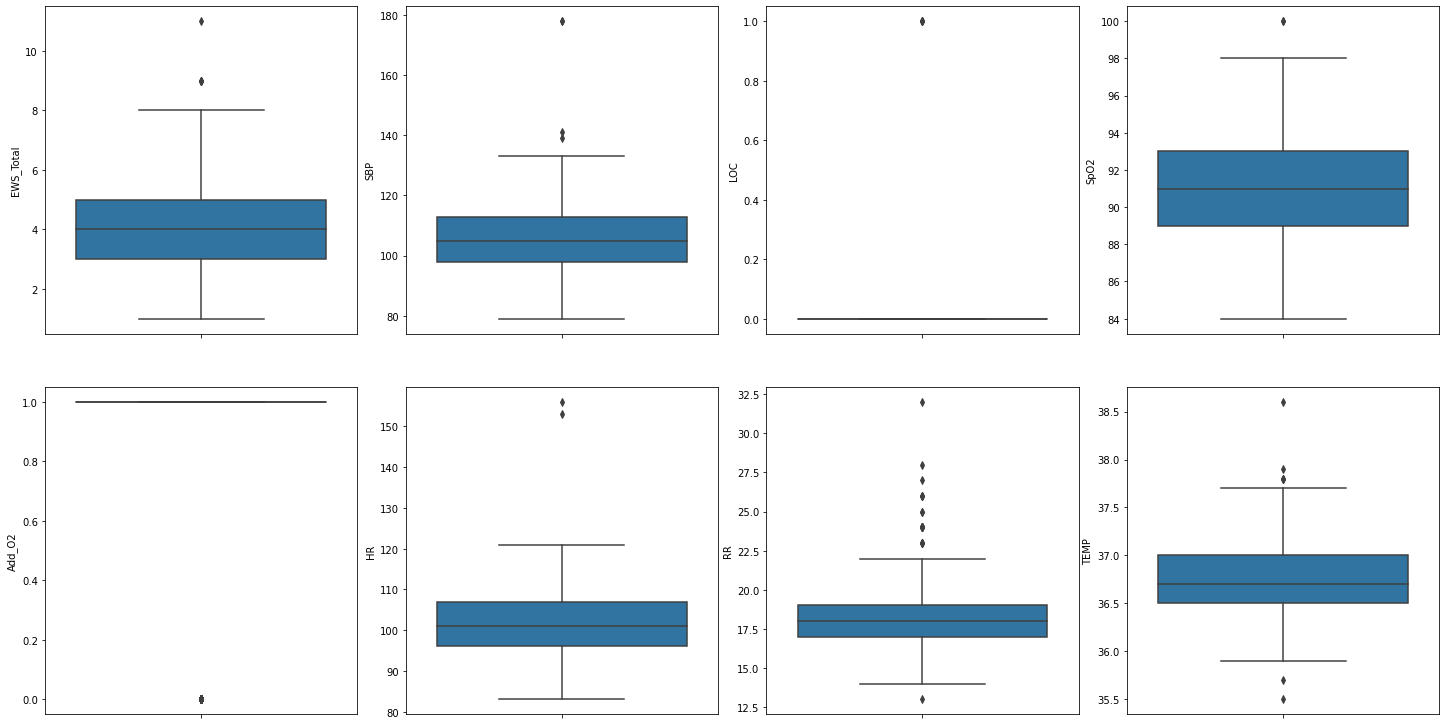

In [98]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in describe.items():
    sns.boxplot(y=k, data=describe, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# LOC and Add_O2 is categorical

In [100]:
for k, v in describe.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(describe)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
        
# check the outliers from every column in %
# RR has most outliers
# others seem fairly normal

Column EWS_Total outliers = 1.79%
Column SBP outliers = 0.65%
Column LOC outliers = 100.00%
Column SpO2 outliers = 0.32%
Column Add_O2 outliers = 100.00%
Column HR outliers = 0.32%
Column RR outliers = 6.33%
Column TEMP outliers = 1.14%


### Histograms

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


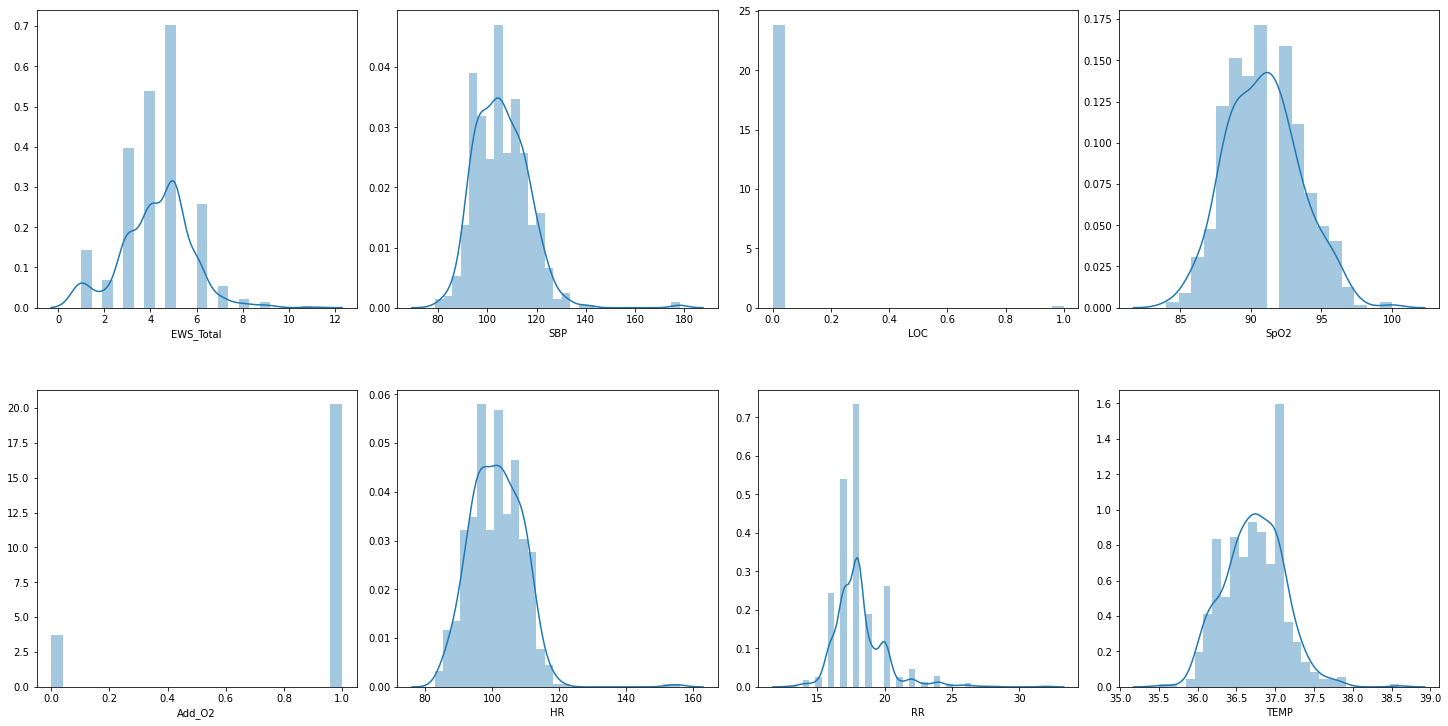

In [101]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in describe.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# SBP, HR, RR is left skewed
# TEMP varies a lot 

### Heatmap

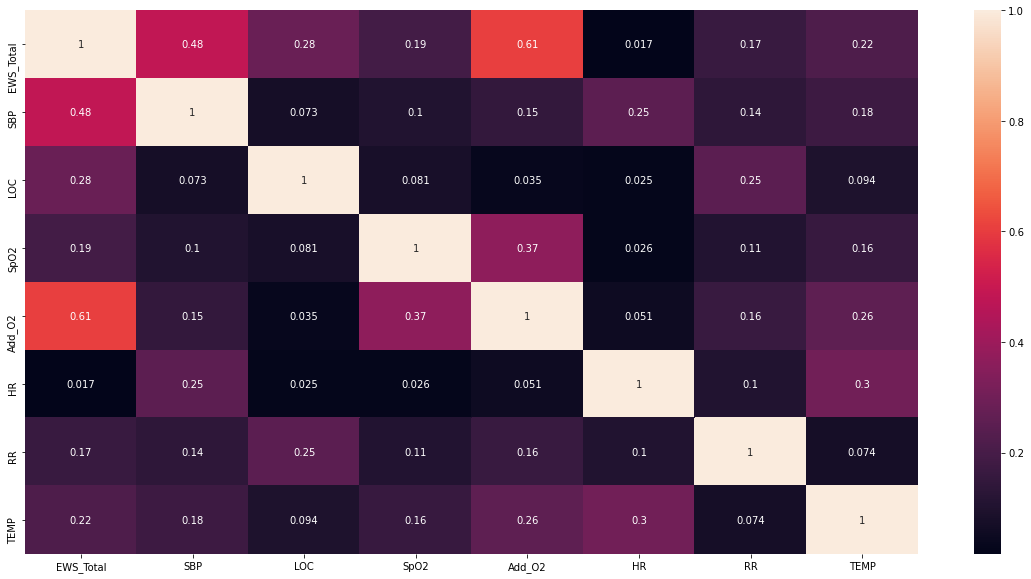

In [105]:
plt.figure(figsize=(20, 10))
sns.heatmap(describe.corr().abs(),  annot=True)
plt.show()

# following features correlate highest with EWS_total: Add_O2, SBP, LOC, TEMP, SpO2, RR, HR (in order)
# Add_O2 is consequence of SpO2 (corr is 37%)
# TEMP also correlates with HR (30%) and Add_O2 (26%)
# RR with LOC (25%)
# HR with SBP (25%)

### Plot each feature against EWS_Total

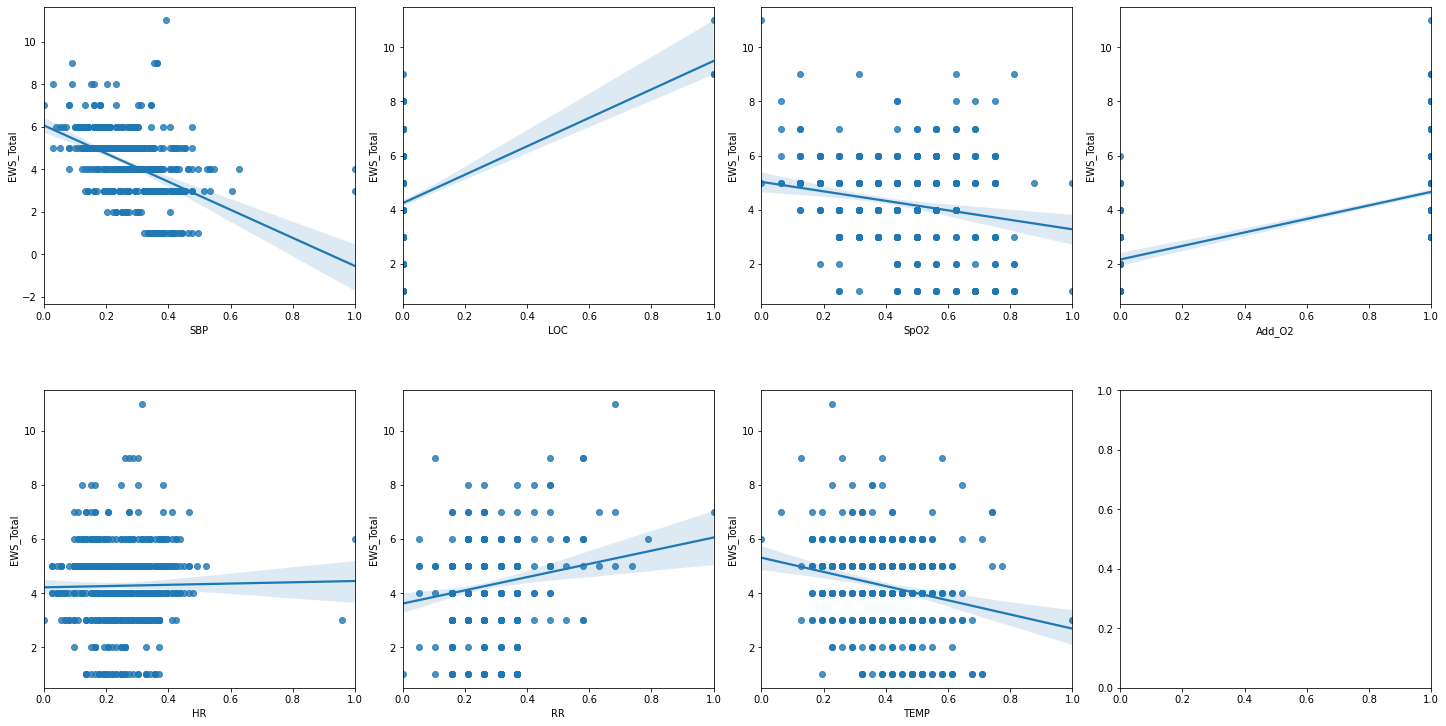

In [111]:
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['SBP', 'LOC','SpO2','Add_O2', 'HR', 'RR', 'TEMP']
x = describe.loc[:,column_sels]
y = describe['EWS_Total']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# LOC and ADD_O2 are categorical [0 -1]
# None of the features is in a linear relation with EWS_Total

## Split dataset (train/test) and check the validity y_pred against y

In [119]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 1/5, random_state = 0)

linearRegressor = LinearRegression() # set up model
linearRegressor.fit(xtrain, ytrain) # fit the training data
print(linearRegressor.score(xtrain, ytrain))# observations that fit the model
linearRegressor.predict(xtest)
print(linearRegressor.score(xtest, ytest)) # explanatory power of the model

0.6837752108894004
0.7492760071679163


In [120]:
ypred = linearRegressor.predict(xtest) # predict unknown data
print(ypred)

[4.14779837 5.15711659 4.77316967 5.37691856 4.6545717  4.82033371
 3.31928361 5.00787008 4.42808812 5.85814593 3.96074038 4.88252222
 4.65390917 4.94248678 4.06041246 5.30445036 4.97423928 5.22385564
 3.74835429 4.83393265 2.09634436 4.92679039 4.45897858 0.36014561
 4.77487535 5.22272269 4.17055448 5.31335696 4.86299535 4.72222315
 4.5247739  4.94605406 5.47338016 3.63359147 4.85864623 4.24836112
 4.48756379 2.94295338 5.08456418 4.29472228 4.87342603 3.91441317
 5.48257922 1.58151518 4.8442957  4.63840453 5.52865071 4.14495749
 4.42649985 2.64382237 4.20636288 4.87777515 4.02571547 4.08656648
 8.89566507 4.92214487 5.00033492 4.37766154 4.12524746 4.0375173
 4.17157823 2.06842195 4.51167927 2.97433859 4.03452049 4.52697557
 1.75722592 5.10732597 4.7468805  5.10006286 4.45298673 4.34881492
 1.08669163 4.0848774  3.2160364  0.91406816 5.38289724 4.10909017
 5.45740398 4.10712522 5.15215053 3.59160591 4.95527692 4.10607853
 5.1021817  5.40338631 5.30614617 5.02398279 5.17753665 1.69755

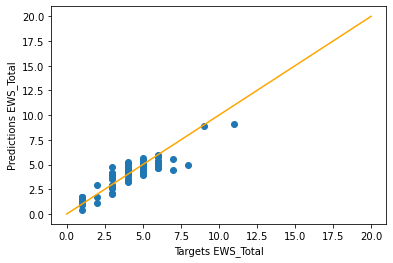

In [127]:
# plot the actual prediction and actual data
plt.scatter(ytest,ypred)
plt.xlabel ('Targets EWS_Total')
plt.ylabel ('Predictions EWS_Total')

# plot a line, a perfect predict would all fall on this line

x = np.linspace(0, 20, 2)
y = x
plt.plot (x, y, c = 'orange')
plt.show ()

# Observations fit the orange line quite OK.